In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
df = pd.read_csv("/content/ETH-USD.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
1,2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2,2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
3,2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
4,2019-03-05,127.792953,138.229980,126.735298,137.822388,137.822388,4764849990
...,...,...,...,...,...,...,...
1823,2024-02-26,3112.529053,3197.375000,3037.954590,3178.993652,3178.993652,17504464351
1824,2024-02-27,3178.405029,3287.958008,3167.830566,3244.519287,3244.519287,21090315368
1825,2024-02-28,3243.893311,3485.450928,3201.575928,3385.703857,3385.703857,32885894265
1826,2024-02-29,3386.802734,3518.969238,3303.905273,3341.919678,3341.919678,28469171094


In [4]:
df1=df.reset_index()['Close']

In [5]:
df1

0        136.443619
1        134.206955
2        132.249420
3        127.774124
4        137.822388
           ...     
1823    3178.993652
1824    3244.519287
1825    3385.703857
1826    3341.919678
1827    3435.053955
Name: Close, Length: 1828, dtype: float64

In [6]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [7]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [8]:
train_data.shape

(1279, 1)

In [9]:
test_data.shape

(549, 1)

In [10]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [11]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [12]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [14]:
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 2s 23ms/step - loss: 0.0149
Epoch 2/100
19/19 [==============================] - 1s 32ms/step - loss: 0.0018
Epoch 3/100
19/19 [==============================] - 1s 31ms/step - loss: 0.0015
Epoch 4/100
19/19 [==============================] - 1s 30ms/step - loss: 0.0013
Epoch 5/100
19/19 [==============================] - 1s 32ms/step - loss: 0.0012
Epoch 6/100
19/19 [==============================] - 1s 32ms/step - loss: 0.0011
Epoch 7/100
19/19 [==============================] - 1s 30ms/step - loss: 9.8938e-04
Epoch 8/100
19/19 [==============================] - 0s 20ms/step - loss: 9.1495e-04
Epoch 9/100
19/19 [==============================] - 0s 16ms/step - loss: 8.5648e-04
Epoch 10/100
19/19 [==============================] - 0s 16ms/step - loss: 8.5171e-04
Epoch 11/100
19/19 [==============================] - 0s 17ms/step - loss: 8.2294e-04
Epoch 12/100
19/19 [==============================] - 0s 17ms/step - loss: 7.6531e-04
E

In [15]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

14/14 [==============================] - 0s 6ms/step


In [16]:
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [17]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mse = np.mean((np.array(ytest) - np.array(y_pred))**2)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)

Testing RMSE: 1916.244057015789
Testing MAPE: 524818.227051595
Testing MSE: 3671991.2860483304


In [18]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.41510422 0.41913304 0.41982664 0.41533296 0.40770371 0.41236624
 0.40823798 0.41305071 0.42040663 0.43711715 0.44307008 0.45360381
 0.4643719  0.4511462  0.47792886 0.47817396 0.47443969 0.47684049
 0.44963975 0.44484535 0.45731176 0.4692081  0.4485249  0.4501391
 0.44366341 0.4480859  0.43970537 0.4448184  0.4528225  0.47132356
 0.4676059  0.4583845  0.45984566 0.4511045  0.48242966 0.47579902
 0.46582865 0.46399407 0.46174069 0.47681183 0.47755809 0.44670091
 0.45909618 0.45901304 0.4532654  0.44927542 0.47270777 0.47521643
 0.52568486 0.53366439 0.51342419 0.52451382 0.50231726 0.51063859
 0.52687334 0.51425567 0.50120646 0.50598788 0.50175317 0.49841889
 0.46798451 0.45306573 0.45155041 0.4481788  0.45870516 0.45885113
 0.45658009 0.46931128 0.4751455  0.46196897 0.46649526 0.46739144
 0.4648391  0.46345822 0.46544542 0.48103901 0.4920022  0.49118573
 0.50556612 0.50848278 0.50983178 0.54185262 0.53846419 0.56733105
 0.57721657 0.57281636 0.56919648 0.588834   0.6025

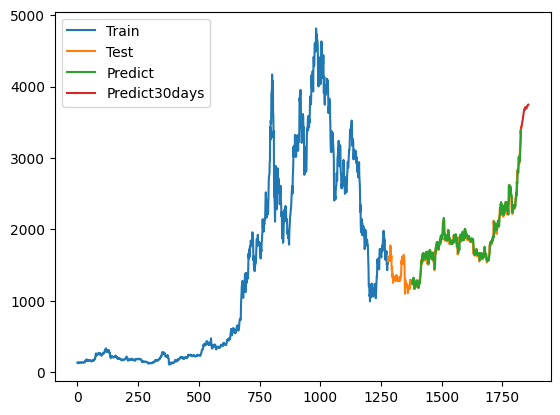

In [19]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [20]:
x_input.shape

(1, 100, 1)

In [21]:
train_size_82 = int(0.8 * len(df1))
test_size_82 = len(df1) - train_size_82
train_data_82 = df1[:train_size_82]
test_data_82 = df1[train_size_82:train_size_82+test_size_82]

In [22]:
X_train_82, y_train_82 = create_dataset(train_data_82, time_step)
X_test_82, ytest_82 = create_dataset(test_data_82, time_step)

In [23]:
X_train_82 =X_train_82.reshape(X_train_82.shape[0],X_train_82.shape[1] , 1)
X_test_82 = X_test_82.reshape(X_test_82.shape[0],X_test_82.shape[1] , 1)

In [24]:
model.fit(X_train_82,y_train_82,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 0s 18ms/step - loss: 3.6823e-04
Epoch 2/100
22/22 [==============================] - 0s 18ms/step - loss: 3.6109e-04
Epoch 3/100
22/22 [==============================] - 0s 17ms/step - loss: 3.7402e-04
Epoch 4/100
22/22 [==============================] - 0s 17ms/step - loss: 3.9280e-04
Epoch 5/100
22/22 [==============================] - 0s 17ms/step - loss: 3.8212e-04
Epoch 6/100
22/22 [==============================] - 0s 17ms/step - loss: 3.7085e-04
Epoch 7/100
22/22 [==============================] - 0s 18ms/step - loss: 4.1389e-04
Epoch 8/100
22/22 [==============================] - 0s 16ms/step - loss: 3.6461e-04
Epoch 9/100
22/22 [==============================] - 0s 16ms/step - loss: 3.6832e-04
Epoch 10/100
22/22 [==============================] - 0s 16ms/step - loss: 3.6106e-04
Epoch 11/100
22/22 [==============================] - 0s 17ms/step - loss: 4.1127e-04
Epoch 12/100
22/22 [==============================] - 0s 17ms/s

In [25]:
train_predict_82=model.predict(X_train_82)
y_pred_82=model.predict(X_test_82)

9/9 [==============================] - 0s 6ms/step


In [26]:
train_predict_82=scaler.inverse_transform(train_predict_82)
y_pred_82=scaler.inverse_transform(y_pred_82)

In [27]:
test_82_rmse = np.sqrt(np.mean((y_pred_82 - ytest_82)**2))
test_82_mape = np.mean(np.abs((ytest_82 - y_pred_82) / ytest_82)) * 100
test_82_mse = np.mean((np.array(ytest_82) - np.array(y_pred_82))**2)
print('Testing RMSE:', test_82_rmse)
print('Testing MAPE:', test_82_mape)
print('Testing MSE:', test_82_mse)

Testing RMSE: 2066.802771522986
Testing MAPE: 519329.8884164167
Testing MSE: 4271673.696375095


In [28]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.41510422 0.41913304 0.41982664 0.41533296 0.40770371 0.41236624
 0.40823798 0.41305071 0.42040663 0.43711715 0.44307008 0.45360381
 0.4643719  0.4511462  0.47792886 0.47817396 0.47443969 0.47684049
 0.44963975 0.44484535 0.45731176 0.4692081  0.4485249  0.4501391
 0.44366341 0.4480859  0.43970537 0.4448184  0.4528225  0.47132356
 0.4676059  0.4583845  0.45984566 0.4511045  0.48242966 0.47579902
 0.46582865 0.46399407 0.46174069 0.47681183 0.47755809 0.44670091
 0.45909618 0.45901304 0.4532654  0.44927542 0.47270777 0.47521643
 0.52568486 0.53366439 0.51342419 0.52451382 0.50231726 0.51063859
 0.52687334 0.51425567 0.50120646 0.50598788 0.50175317 0.49841889
 0.46798451 0.45306573 0.45155041 0.4481788  0.45870516 0.45885113
 0.45658009 0.46931128 0.4751455  0.46196897 0.46649526 0.46739144
 0.4648391  0.46345822 0.46544542 0.48103901 0.4920022  0.49118573
 0.50556612 0.50848278 0.50983178 0.54185262 0.53846419 0.56733105
 0.57721657 0.57281636 0.56919648 0.588834   0.6025

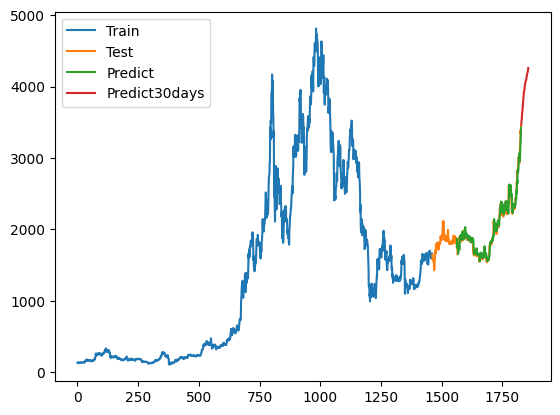

In [29]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_82, step=1)
plt.plot(scaler.inverse_transform(train_data_82))
test_data_index = pd.RangeIndex(start=train_size_82, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_82))
test_data_index = pd.RangeIndex(start=train_size_82+101, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,(y_pred_82))
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [30]:
train_size_91 = int(0.9 * len(df1))
test_size_91 = len(df1) - train_size_91
train_data_91 = df1[:train_size_91]
test_data_91 = df1[train_size_91:train_size_91+test_size_91]

In [31]:
X_train_91, y_train_91 = create_dataset(train_data_91, time_step)
X_test_91, ytest_91 = create_dataset(test_data_91, time_step)

In [32]:
X_train_91 =X_train_91.reshape(X_train_91.shape[0],X_train_91.shape[1] , 1)
X_test_91 = X_test_91.reshape(X_test_91.shape[0],X_test_91.shape[1] , 1)

In [33]:
model.fit(X_train_91,y_train_91,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 0s 16ms/step - loss: 3.3124e-04
Epoch 2/100
25/25 [==============================] - 0s 17ms/step - loss: 3.4448e-04
Epoch 3/100
25/25 [==============================] - 0s 16ms/step - loss: 3.3691e-04
Epoch 4/100
25/25 [==============================] - 1s 31ms/step - loss: 3.5100e-04
Epoch 5/100
25/25 [==============================] - 1s 32ms/step - loss: 3.2946e-04
Epoch 6/100
25/25 [==============================] - 1s 31ms/step - loss: 3.5294e-04
Epoch 7/100
25/25 [==============================] - 1s 33ms/step - loss: 3.3047e-04
Epoch 8/100
25/25 [==============================] - 1s 20ms/step - loss: 3.5713e-04
Epoch 9/100
25/25 [==============================] - 0s 18ms/step - loss: 3.4473e-04
Epoch 10/100
25/25 [==============================] - 0s 17ms/step - loss: 3.2137e-04
Epoch 11/100
25/25 [==============================] - 0s 17ms/step - loss: 3.3246e-04
Epoch 12/100
25/25 [==============================] - 0s 17ms/s

In [34]:
train_predict_91=model.predict(X_train_91)
y_pred_91=model.predict(X_test_91)

3/3 [==============================] - 0s 8ms/step


In [35]:
train_predict_91=scaler.inverse_transform(train_predict_91)
y_pred_91=scaler.inverse_transform(y_pred_91)

In [36]:
test_91_rmse = np.sqrt(np.mean((y_pred_91 - ytest_91)**2))
test_91_mape = np.mean(np.abs((ytest_91 - y_pred_91) / ytest_91)) * 100
test_91_mse = np.mean((np.array(ytest_91) - np.array(y_pred_91))**2)
print('Testing RMSE:', test_91_rmse)
print('Testing MAPE:', test_91_mape)
print('Testing MSE:', test_91_mse)

Testing RMSE: 2495.512134481974
Testing MAPE: 499385.96270316583
Testing MSE: 6227580.813346778


In [37]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.41510422 0.41913304 0.41982664 0.41533296 0.40770371 0.41236624
 0.40823798 0.41305071 0.42040663 0.43711715 0.44307008 0.45360381
 0.4643719  0.4511462  0.47792886 0.47817396 0.47443969 0.47684049
 0.44963975 0.44484535 0.45731176 0.4692081  0.4485249  0.4501391
 0.44366341 0.4480859  0.43970537 0.4448184  0.4528225  0.47132356
 0.4676059  0.4583845  0.45984566 0.4511045  0.48242966 0.47579902
 0.46582865 0.46399407 0.46174069 0.47681183 0.47755809 0.44670091
 0.45909618 0.45901304 0.4532654  0.44927542 0.47270777 0.47521643
 0.52568486 0.53366439 0.51342419 0.52451382 0.50231726 0.51063859
 0.52687334 0.51425567 0.50120646 0.50598788 0.50175317 0.49841889
 0.46798451 0.45306573 0.45155041 0.4481788  0.45870516 0.45885113
 0.45658009 0.46931128 0.4751455  0.46196897 0.46649526 0.46739144
 0.4648391  0.46345822 0.46544542 0.48103901 0.4920022  0.49118573
 0.50556612 0.50848278 0.50983178 0.54185262 0.53846419 0.56733105
 0.57721657 0.57281636 0.56919648 0.588834   0.6025

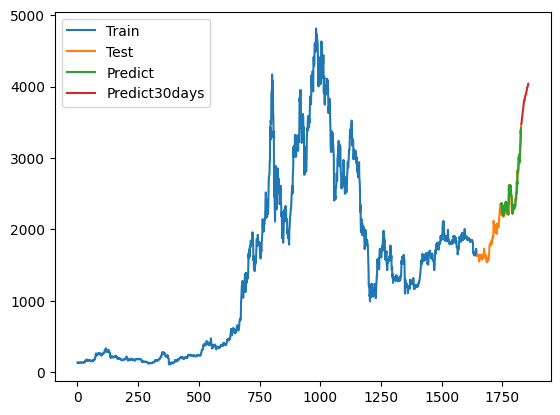

In [38]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_91, step=1)
plt.plot(scaler.inverse_transform(train_data_91))
test_data_index = pd.RangeIndex(start=train_size_91, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_91))
test_data_index = pd.RangeIndex(start=train_size_91+101, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,(y_pred_91))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()